# XGBoost - Extream Gradient Boosting

## Agenda:
1. Boosting
	- AdaBoost
	- Gradient Boosting
	- EGBoost - Reglarization
2. Data
	- Load data
	- EDA
3. Grid Search
4. XGBoost
	- Plotting feature importance using built in methods
	- Analyzing Performance on Test Data
5. Appying Random Forest
6. Applying AdaBoost
7. Applying Logistic Regession
8. Compare models performance

**AdaBoost** algorithm creates a set of poor learners by maintaining a collection of weights over
training data and adjusts them after each weak learning cycle adaptively. The weights of the training
samples which are misclassified by current weak learner will be increased while the weights of the
samples which are correctly classified will be decreased. So, AdaBoost changes sample distribution for every iteration.  

**Gradient Boosting** is doesn't modify sample distribution. The week learner trains on the remaining errors(pseudo residuals)of the strong learner. At each ireration the pseudo residuals are computed and week learner is fitted to pseudo residuals. The contribution of week learner is computed using **Gradient Descent Optimization Process**. Te computed contribution is the one minimizing the over all error of the strong learner. 

### **XGBoot: = Gradient Boosting + Regularization**
XGBoost is same as GB and it adds the Regularization parameter function to deal with overfitting the model. It extreamly deals with **Bias-Variance** trade off. 

**Regularization** function control the complexty of the model. There are 3 kinds of regularizations. Namly, L1 regularization(Lasso), L2 Regularization(Ridge) and L1/L2 Regularization(Elastic Net).

XGBoost works with only numerical values.

In [1]:
#your_local_path="C:/Users/s.mudalapuram/Documents/PythonMe/data/"

In [2]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## Data

 This dataset is the classic “Adult Data Set”. An older set from 1996, this dataset contains census data on income. Our job is to predict whether a certain individual had an income of greater than 50,000 based on their demographic information.

In [3]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',
                     skiprows = 1, header = None) # Make sure to skip a row for the test set

In [4]:
#train_set = pd.read_csv(your_local_path+'adult_training.csv',header=None)
#test_set = pd.read_csv(your_local_path+'adult_test.csv',header=None)

In [5]:
train_set

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [6]:
print(train_set.shape)
train_set.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
print(test_set.shape)
test_set.head()

(16281, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### EDA

Things to notice

No column for header in data

Unknown values in data like NA, ?


The target value in test data is >50K. whereas in train data >50K

The description of dataset is provided and based upon that we can name columns

https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

In [8]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

In [9]:
#applying to both datafames
train_set.columns = col_labels
test_set.columns = col_labels

In [10]:
#to check the presence of NA values

train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [12]:
#but still there are few question marks in data so lets replace them with NA
#remove the records which contains na

In [13]:
train_nomissing  = train_set.replace(' ?', np.nan).dropna()

test_nomissing  = test_set.replace(' ?', np.nan).dropna()

test_nomissing['wage_class'] = test_nomissing.wage_class.replace({' <=50K.': ' <=50K', ' >50K.':' >50K'})

In [14]:
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
train_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
train_nomissing.shape

(30162, 15)

In [17]:
test_nomissing.shape

(15060, 15)

Before applying XGBoost. We need to make sure everything encoded as a string is turned into a variable.

In [18]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0) # Stacks them vertically

In [19]:
combined_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
combined_set.shape

(45222, 15)

In [21]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null object
fnlwgt            45222 non-null int64
education         45222 non-null object
education_num     45222 non-null int64
marital_status    45222 non-null object
occupation        45222 non-null object
relationship      45222 non-null object
race              45222 non-null object
sex               45222 non-null object
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null object
wage_class        45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


We can see they are now combined. Next, if the feature is not already numerical, we need to encode it as one. We can use pandas Categorical codes for this task. To make things more simple, I will use a loop to apply this on every feature that isn’t an integer.

In [22]:
for feature in combined_set.columns: # Loop through all columns in the dataframe
    if combined_set[feature].dtype == 'object': # Only apply for columns with categorical strings
        combined_set[feature] = pd.Categorical(combined_set[feature]).codes # Replace strings with an integer
        

In [23]:
combined_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
6,49,2,160187,6,5,3,7,1,2,0,0,0,16,22,0
7,52,4,209642,11,9,2,3,0,4,1,0,0,45,38,1
8,31,2,45781,12,14,4,9,1,4,0,14084,0,50,38,1
9,42,2,159449,9,13,2,3,0,4,1,5178,0,40,38,1


In [24]:
train_nomissing

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [25]:
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
age               45222 non-null int64
workclass         45222 non-null int8
fnlwgt            45222 non-null int64
education         45222 non-null int8
education_num     45222 non-null int64
marital_status    45222 non-null int8
occupation        45222 non-null int8
relationship      45222 non-null int8
race              45222 non-null int8
sex               45222 non-null int8
capital_gain      45222 non-null int64
capital_loss      45222 non-null int64
hours_per_week    45222 non-null int64
native_country    45222 non-null int8
wage_class        45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 2.8 MB


Now that we have all of our features encoded, we need to split these back into their original train/test sizes. Since they haven’t been shuffled we just need to retrieve the same indices as before.

In [32]:
final_train = combined_set[:train_nomissing.shape[0]] # Up to the last initial training set row
final_test = combined_set[train_nomissing.shape[0]:] # Past the last initial training set row

In [33]:
final_train.shape

(30162, 15)

In [34]:
final_test.shape

(15060, 15)

We still have our target value inside our train and test frames that needs to be separated from the feature vectors we will be feeding into XGBoost. Let’s get those now.

In [35]:
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

Now import the libraries we will need to do grid search for XGBoost. Fortunately for those of us used to sklearn’s API, XGBoost is compatible with this, so we can still utilize the traditional GridSearch with XGBoost.

## Grid Search

In [36]:
from xgboost import XGBClassifier
from sklearn.grid_search import GridSearchCV

To known even more about parameter tuning go to the link:
https://github.com/dmlc/xgboost/blob/master/doc/parameter.md


I am going to start tuning on the maximum depth of the trees first, along with the min_child_weight, which is very similar to min_samples_split in sklearn’s version of gradient boosted trees. We set the objective to ‘binary:logistic’ since this is a binary classification problem 
 


In [37]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 
# Optimize for accuracy since that is the metric used in the Adult Data Set notation

In [38]:
%time optimized_GBM.fit(final_train, y_train)

Wall time: 13min 39s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [39]:
optimized_GBM.grid_scores_

[mean: 0.86712, std: 0.00225, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86659, std: 0.00339, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86659, std: 0.00295, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86214, std: 0.00197, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86161, std: 0.00143, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86208, std: 0.00236, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85651, std: 0.00183, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85575, std: 0.00246, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85694, std: 0.00347, params: {'max_depth': 7, 'min_child_weight': 5}]

### Early stopping CV

Based on the CV testing performed earlier, we want to utilize the following parameters:

Learning_rate (eta) = 0.1

Subsample, colsample_bytree = 0.8

Max_depth = 3

Min_child_weight = 1

As we have used sklearns cv now we will be utilizing XGBoost's built-in cv which allows early stopping to prevent overfitting.

To increase the performance of XGBoost's speed through many iterations of the training set, and since we are using only XGBoost's API and not sklearn's anymore, we can create a DMatrix. This sorts the data initially to optimize for XGBoost when it builds trees, making the algorithm more efficient. This is especially helpful when you have a very large number of training examples. To create a DMatrix:

## XGBoost

In [40]:
import xgboost
xgdmat = xgboost.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient

Now let's specify our parameters (with slightly different syntax in some places for the XGBoost native API) and set our stopping criteria.

In [41]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

%time cv_xgb = xgboost.cv(params = our_params, dtrain = xgdmat, num_boost_round = 3000, nfold = 5, metrics = ['error'], early_stopping_rounds = 100)
# Look for early stopping that minimizes error, # Make sure you enter metrics inside a list or you may encounter issues!

Wall time: 2min 6s


We can look at our CV results to see how accurate we were with these settings. The output is automatically saved into a pandas dataframe for us.

In [42]:
cv_xgb.tail(5)

,train-error-mean,train-error-std,test-error-mean,test-error-std
489,0.115584,0.001395,0.129998,0.004691
490,0.115617,0.001414,0.129965,0.004479
491,0.115501,0.001397,0.129965,0.004494
492,0.115501,0.001483,0.129964,0.004581
493,0.115385,0.001528,0.129932,0.004657


Our CV test error at this number of iterations is 12.897%, or 87.103% accuracy.

Now that we have our best settings, let's create this as an XGBoost object model that we can reference later.

In [43]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgboost.train(our_params, xgdmat, num_boost_round = 493)

### Plotting feature importance using built in methods

Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.

This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.

Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.

The feature importances are then averaged across all of the the decision trees within the model.

In [44]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

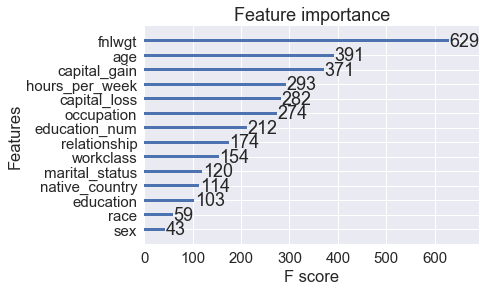

In [45]:
xgboost.plot_importance(final_gb)
#F score is a metric that simply sums up how many times each feature is split on

This will tell us which features were most important in the series of trees. The 'fnlwgt' feature seems to have the most importance. Filing capital gains was also important, which makes sense given that only those with greater incomes have the ability to invest. Race and sex were not as important.

### Analyzing Performance on Test Data

The model has now been tuned using cross-validation grid search through the sklearn API and early stopping through the built-in XGBoost API. Now, we can see how it finally performs on the test set. Does it match our CV performance? First, create another DMatrix (this time for the test data).

In [46]:
testdmat = xgboost.DMatrix(final_test)

In [47]:
from sklearn.metrics import accuracy_score
y_pred = final_gb.predict(testdmat) # Predict using our testdmat
y_pred

array([0.00289687, 0.2055959 , 0.29231715, ..., 0.8459931 , 0.14419176,
       0.7777018 ], dtype=float32)

You can see that the predict function for XGBoost outputs probabilities by default and not actual class labels. To calculate accuracy we need to convert these to a 0/1 label. We will set 0.5 probability as our threshold.

In [48]:
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
y_pred

array([0., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [49]:
accuracy_score(y_pred, y_test), 1-accuracy_score(y_pred, y_test)

(0.8685922974767596, 0.1314077025232404)

## Applying Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 25,
                                min_samples_split=2, 
                                n_estimators = 100, random_state = 1)
my_forest = forest.fit(final_train, y_train)
train_pred = my_forest.predict(final_train)

In [51]:
train_confusion = metrics.confusion_matrix(y_train, train_pred)
train_confusion

array([[22505,   149],
       [  330,  7178]], dtype=int64)

In [52]:
metrics.accuracy_score(y_train,train_pred)

0.9841190902460049

In [53]:
test_pred = my_forest.predict(final_test)
test_confusion = metrics.confusion_matrix(y_test, test_pred)
test_confusion

array([[10566,   794],
       [ 1404,  2296]], dtype=int64)

In [54]:
metrics.accuracy_score(y_test,test_pred)

0.854050464807437

### Applying Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [56]:
my_ada = ada.fit(final_train, y_train)
train_pred_ada = my_ada.predict(final_train)
train_confusion_ada = metrics.confusion_matrix(y_train, train_pred_ada)
train_confusion_ada

array([[21311,  1343],
       [ 2931,  4577]], dtype=int64)

In [57]:
metrics.accuracy_score(y_train,train_pred_ada)

0.8582985213182149

In [58]:
test_pred_ada = my_ada.predict(final_test)
test_confusion_ada = metrics.confusion_matrix(y_test, test_pred_ada)
print(test_confusion_ada)
print(metrics.accuracy_score(y_test,test_pred_ada))

[[10659   701]
 [ 1474  2226]]
0.8555776892430279


### Applying Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [60]:
my_log = log.fit(final_train, y_train)
train_pred_log = my_log.predict(final_train)
train_confusion_log = metrics.confusion_matrix(y_train, train_pred_log)
train_confusion_log
metrics.accuracy_score(y_train,train_pred_log)
test_pred_log = my_log.predict(final_test)
test_confusion_log = metrics.confusion_matrix(y_test, test_pred_log)
print(test_confusion_log)
print(metrics.accuracy_score(y_test,test_pred_log))

[[10751   609]
 [ 2609  1091]]
0.7863213811420983


### Compare models performance
The accuracy for Xgboost is greater than the other algorithms. Randome forest showing for more better than all but it sufers with overfitting.